# Normality Tests ( Checking Normal Distributions ) 

**In statistics, normality tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.**

#### Tests whether a data sample has a Gaussian (Normal) distribution.

#### Assumptions

Observations in each sample are independent and identically distributed.

#### Interpretation

H0: the sample has a Gaussian distribution. <br>
H1: the sample does not have a Gaussian distribution.


Here, I have shown three oftenly used normality tests which are following:

#### 1. Shapiro-Wilk Test
#### 2. D’Agostino’s K<sup>2</sup> Test
#### 3. Anderson-Darling Test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("../input/heart-disease-uci/heart.csv")
df1.head()

In [ ]:
df2 = pd.read_csv("../input/normal-distribution-data/CompanyABCProfit.csv")
df2.rename(columns = {"Profit(Rs '000)":"profit"}, inplace=True)
df2.head()

# Shapiro-Wilk Test

**The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold). The formula for the W value is:**

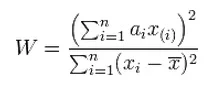

where:
- xi are the ordered random sample values
- ai are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.

**The test has limitations, most importantly that the test has a bias by sample size. The larger the sample, the more likely you’ll get a statistically significant result.** [Source](https://www.statisticshowto.com/shapiro-wilk-test/)

In [ ]:
from scipy.stats import shapiro

stat1, p1 = shapiro(df1['oldpeak'])
stat2, p2 = shapiro(df2['profit'])


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'
    
if p2 > 0.05:
    s2 = 'It is normally distributed.'
else:
    s2 = 'It is not normally distributed.'

plt.figure(figsize=(20,6))
  
plt.subplot(121)
sns.histplot(df1['oldpeak'],kde=True, color='red')
plt.axvline(df1['oldpeak'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)

plt.subplot(122)
sns.histplot(df2['profit'],kde=True, color='green')
plt.axvline(df2['profit'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat2)+" ,  P value:" + str(p2)+ "  , " + s2)


plt.show() 

# D’Agostino’s K<sup>2</sup> Test

**The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.**

- **Skew** is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- **Kurtosis** quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [ ]:
from scipy.stats import normaltest

stat1, p1 = normaltest(df1['thalach'])
stat2, p2 = normaltest(df2['profit'])


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'
    
if p2 > 0.05:
    s2 = 'It is normally distributed.'
else:
    s2 = 'It is not normally distributed.'

fig = plt.figure(figsize=(20,6))

plt.subplot(121)
plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)
sns.histplot(df1['thalach'],kde=True, color="red")
plt.axvline(df1['thalach'].mean(), color='k', linestyle='dashed', linewidth=2)


plt.subplot(122)
plt.title("Stats:"+ str(stat2)+" ,  P value:" + str(p2)+ "  , " + s2)
sns.histplot(df2['profit'],kde=True, color="green")
plt.axvline(df2['profit'].mean(), color='k', linestyle='dashed', linewidth=2)


plt.show()

# Anderson-Darling Test

**The Anderson-Darling Goodness of Fit Test (AD-Test) is a measure of how well your data fits a specified distribution. It’s commonly used as a test for normality.**

Performing the AD-Test by Hand

The hypotheses for the AD-test are:

H0: The data comes from a specified distribution.<br>
H1: The data does not come from a specified distribution.

The formula is:
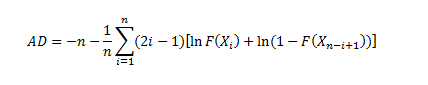

Where:
- n = the sample size,
- F(x) = CDF for the specified distribution,
- i = the ith sample, calculated when the data is sorted in ascending order.

As you can probably see, the test statistic is cumbersome to calculate by hand. The general steps are:
- Step 1: Calculate the AD Statistic for each distribution, using the formula above.
- Step 2: Find the statistic’s p-value (probability value). The formula for the p-value depends on the value for the AD statistic from Step 1. [Source](https://www.statisticshowto.com/anderson-darling-test/)

In [ ]:
from scipy.stats import anderson

data = df2['profit']
result = anderson(data)

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


In [ ]:
from scipy.stats import anderson

data = df1['thalach']
result = anderson(data)

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))